In [0]:
import numpy as np
import cv2
!pip install git+https://github.com/rcmalli/keras-vggface.git
from keras_vggface.vggface import VGGFace
import matplotlib.pyplot as plt

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-bow9eapi
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-bow9eapi
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=b87128d3923be0224a86bb09bd37a64b569e7e541d604fa1c2252048e3681858
  Stored in directory: /tmp/pip-ephem-wheel-cache-3_p_93aq/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


Using TensorFlow backend.


In [0]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

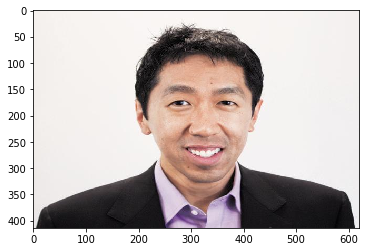

In [0]:
img = cv2.imread('and.jpg')
img2 = np.copy(img)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

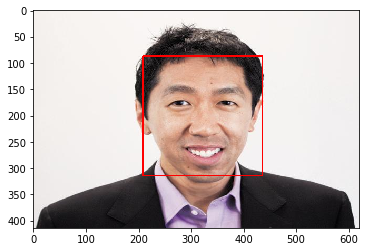

In [0]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
    andrew = img2[y:y+h, x:x+w]
    
plt.imshow(img2)

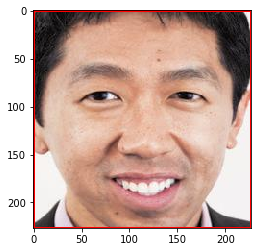

In [0]:
plt.imshow(andrew)

In [0]:
# create a vggface model
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
andrew = cv2.resize(andrew, (224,224))
andrew = np.expand_dims(andrew, axis=0)
andrew.shape


(1, 224, 224, 3)

In [0]:
andF = model.predict(andrew)
andF.shape

(1, 2048)

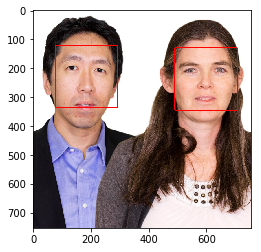

In [0]:
andrew_wife = cv2.imread('11.jpg')
aw_copy = np.copy(andrew_wife)
aw_copy = cv2.cvtColor(aw_copy, cv2.COLOR_BGR2RGB)
image = []
gray = cv2.cvtColor(andrew_wife, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(aw_copy,(x,y),(x+w,y+h),(255,0,0),2)
    image.append(aw_copy[y:y+h, x:x+w])
    
plt.imshow(aw_copy)

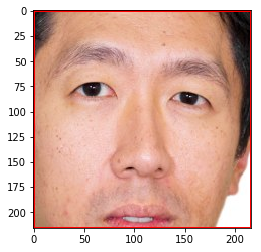

In [0]:
plt.imshow(image[0])

In [0]:
andrew = cv2.resize(image[1], (224,224))
andrew = np.expand_dims(andrew, axis=0)
z = model.predict(andrew)

In [0]:
from scipy.spatial.distance import cosine

In [0]:
d = cosine(z,andF )
d

0.6762388944625854